# Competitive Analysis of PASTA (MUELLER brand)

## Combining raw data with SQL

In [1]:
"""
CREATE TABLE joined_data AS
SELECT *
FROM dh_product_lookup pl
JOIN dh_transactions tr
ON pl.upc = tr.upc
;

"""

'\nCREATE TABLE joined_data AS\nSELECT *\nFROM dh_product_lookup pl\nJOIN dh_transactions tr\nON pl.upc = tr.upc\n;\n\n'

## Preprocessing raw data

In [2]:
import pandas as pd
import numpy as np

In [3]:
def load_data():
    try:
        data = pd.read_csv(file_path)
        print("\nData loaded successfully!")
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

file_path = ("dh_carboload_raw_data.csv")

data = load_data()


Data loaded successfully!


In [4]:
# Inspect the data

display(data.head())
data.info()
data.describe(include="all").round(0)


,upc,product_description,commodity,brand,product_size,upc:1,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,4.99,1,2130,1,23,221275,22,487026,156,0
1,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.59,1,2116,1,13,197660,182,330724,90,0
2,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.79,1,905,1,66,202892,69,2030713,458,0
3,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.79,1,1026,1,69,313690,201,2117875,477,0
4,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.79,1,1033,1,80,197886,19,2539040,559,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   product_description  object 
 2   commodity            object 
 3   brand                object 
 4   product_size         object 
 5   upc:1                int64  
 6   dollar_sales         float64
 7   units                int64  
 8   time_of_transaction  int64  
 9   geography            int64  
 10  week                 int64  
 11  household            int64  
 12  store                int64  
 13  basket               int64  
 14  day                  int64  
 15  coupon               int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 634.5+ MB


,upc,product_description,commodity,brand,product_size,upc:1,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
count,5.197681e+06,5197681,5197681,5197681,5154085,5.197681e+06,5197681.0,5197681.0,5197681.0,5197681.0,5197681.0,5197681.0,5197681.0,5197681.0,5197681.0,5197681.0
unique,NaN,872,4,131,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,PRIVATE LABEL THIN SPAGHETTI,pasta,Private Label,16 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,173093,2327944,1502556,1436562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.203548e+09,NaN,NaN,NaN,NaN,6.203548e+09,2.0,1.0,1544.0,1.0,53.0,223138.0,202.0,1662961.0,370.0,0.0
std,3.152023e+09,NaN,NaN,NaN,NaN,3.152023e+09,1.0,1.0,385.0,0.0,30.0,141216.0,112.0,959319.0,210.0,0.0
min,1.111124e+08,NaN,NaN,NaN,NaN,1.111124e+08,-12.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
25%,3.620000e+09,NaN,NaN,NaN,NaN,3.620000e+09,1.0,1.0,1258.0,1.0,27.0,99053.0,105.0,829906.0,185.0,0.0
50%,5.100013e+09,NaN,NaN,NaN,NaN,5.100013e+09,2.0,1.0,1602.0,1.0,55.0,209694.0,209.0,1666884.0,380.0,0.0
75%,9.999982e+09,NaN,NaN,NaN,NaN,9.999982e+09,2.0,1.0,1825.0,2.0,79.0,339568.0,300.0,2496495.0,551.0,0.0


In [5]:
# Check for duplicates and missing values

print("Initial duplicate entries:", data.duplicated().sum())
missing_values = data.isnull().sum()
print("\nInitial missing values:\n")
print(missing_values[missing_values > 0])


Initial duplicate entries: 0

Initial missing values:

product_size    43596
dtype: int64


In [6]:
# Provide frequency counts for each categorical column

for column in data.select_dtypes(include='object').columns:
    print(f"\n{column} value counts:")
    print(data[column].value_counts())



product_description value counts:
PRIVATE LABEL THIN SPAGHETTI           173093
PRIVATE LABEL SPAGHETTI REGULAR        171884
PRIVATE LABEL ELBOW MACARONI            99065
PRIVATE LABEL ANGEL HAIR PASTA          79920
RAGU TRADITIONAL PLAIN                  79305
                                        ...  
LOG CABIN MAPLE PANCAKE/WAFFLE              1
M C ARRIBIATA SAUCE 26 OZ                   1
MRS BUTTERWORTH\LT SYRUP                    1
EDDIE DVEG CONFETTI PASTA                   1
PRIVATE LABEL TRADITIONAL SPAGHETTI         1
Name: product_description, Length: 872, dtype: int64

commodity value counts:
pasta            2327944
pasta sauce      1913522
syrups            685918
pancake mixes     270297
Name: commodity, dtype: int64

brand value counts:
Private Label            1502556
Ragu                      738294
Barilla                   388135
Prego                     342971
Private Label Premium     229686
                          ...   
Eden                           1

In [7]:
# EXTRACT PERIOD FEATURES

def extract_period_features_from_integers(df, column_name):
    # Check column existence
    if column_name not in df.columns:
        print(f"Column {column_name} does not exist in DataFrame.")
        return df

    # Define the length of each period
    days_in_week = 7
    days_in_four_week = 28
    days_in_quarter = 91  
    days_in_year = 365  

    # Calculate the offset to start the first complete period at the end of the data
    total_days = df[column_name].max()
    offset_week = (total_days % days_in_week)
    offset_four_week = (total_days % days_in_four_week)
    offset_quarter = (total_days % days_in_quarter)
    offset_year = (total_days % days_in_year)

    # Adjust calculation to ensure periods start at 1 and there is no period 0
    
    df['Week'] = ((data[column_name] - 1 + offset_week) // days_in_week) + 1
    df['FourWeek'] = ((data[column_name] - 1 + offset_four_week) // days_in_four_week) + 1
    df['Quarter'] = ((data[column_name] - 1 + offset_quarter) // days_in_quarter) + 1
    df['Year'] = ((data[column_name] - 1 + offset_year) // days_in_year) + 1
    return df

column_to_use = 'day'
data = extract_period_features_from_integers(data, column_to_use)
display(data.head())


,upc,product_description,commodity,brand,product_size,upc:1,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,Week,FourWeek,Quarter,Year
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,4.99,1,2130,1,23,221275,22,487026,156,0,23,6,2,2
1,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.59,1,2116,1,13,197660,182,330724,90,0,13,4,1,2
2,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.79,1,905,1,66,202892,69,2030713,458,0,66,17,6,3
3,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.79,1,1026,1,69,313690,201,2117875,477,0,69,18,6,3
4,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.79,1,1033,1,80,197886,19,2539040,559,0,80,20,7,3


In [8]:
# IMPLEMENT CLEANING DECISIONS 

data_cleaned = data.copy()
data_cleaned.fillna('MISSING')
for col in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[col] = data_cleaned[col].str.strip()

data_cleaned.drop(columns=['time_of_transaction', 'geography', 'store', 'coupon','upc:1', 'week'], inplace=True)
data_cleaned = data_cleaned[data_cleaned['dollar_sales'] >= 0] 

dh_pasta = data_cleaned[data_cleaned['commodity'] == 'pasta']
dh_pasta_sauce = data_cleaned[data_cleaned['commodity'] == 'pasta sauce']
dh_syrups = data_cleaned[data_cleaned['commodity'] == 'syrups']
dh_pancake_mixes = data_cleaned[data_cleaned['commodity'] == 'pancake mixes']
        


In [9]:
dh_pasta.to_csv('dh_pasta.csv', index=False)
dh_pasta_sauce.to_csv('dh_pasta_sauce.csv', index=False)
dh_syrups.to_csv('dh_syrups.csv', index=False)
dh_pancake_mixes.to_csv('dh_pancake_mixes.csv', index=False)

## Customer Dashboard (Mueller)

In [10]:
# Import packages and set styles (includes plotting in case you want to play around)

import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
pd.set_option('display.max_rows', 50) 

In [11]:
# Import selected file - change the filename as needed

input_file_name = 'dh_pasta.csv'
df = pd.read_csv(input_file_name)
df = df[df['brand'] == 'Mueller']


In [12]:
# Inspect the dataframe

df

,upc,product_description,commodity,brand,product_size,dollar_sales,units,household,basket,day,Week,FourWeek,Quarter,Year
238096,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.50,1,326722,3125854,686,98,25,8,3
238097,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.50,1,296491,3121457,685,98,25,8,3
238098,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.59,1,33974,305385,80,12,3,1,2
238099,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.59,1,303930,424023,21,3,1,1,2
238100,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.59,1,213375,1196877,271,39,10,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539608,4732530208,ITALIAN MOSTACCIOLI,pasta,Mueller,17.7 OZ,2.38,2,326603,848733,70,10,3,1,2
539609,4732530208,ITALIAN MOSTACCIOLI,pasta,Mueller,17.7 OZ,2.38,2,205249,465411,37,6,2,1,2
539610,4732530208,ITALIAN MOSTACCIOLI,pasta,Mueller,17.7 OZ,2.38,3,350727,418857,19,3,1,1,2
539611,4732530208,ITALIAN MOSTACCIOLI,pasta,Mueller,17.7 OZ,2.38,4,355423,425573,21,3,1,1,2


In [13]:
# Explore the data

df.info()
duplicates = df.duplicated().sum()
missing = df.isnull().sum()

print('\nDuplicates',duplicates)
print('\nMissing\n\n',missing)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202401 entries, 238096 to 539612
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   upc                  202401 non-null  int64  
 1   product_description  202401 non-null  object 
 2   commodity            202401 non-null  object 
 3   brand                202401 non-null  object 
 4   product_size         202401 non-null  object 
 5   dollar_sales         202401 non-null  float64
 6   units                202401 non-null  int64  
 7   household            202401 non-null  int64  
 8   basket               202401 non-null  int64  
 9   day                  202401 non-null  int64  
 10  Week                 202401 non-null  int64  
 11  FourWeek             202401 non-null  int64  
 12  Quarter              202401 non-null  int64  
 13  Year                 202401 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 23.2+ MB

Dupl

In [14]:
# Establish the number of category buyers / customers

all_customers = (df['household']).nunique()
print("Total number of unique households buying: ", all_customers)

Total number of unique households buying:  90952


In [15]:
# Obtain raw statistics for quarterly sales and buyer metrics

quarterly_totals = df.groupby('Quarter').agg(
    Total_Num_Customers=('household', 'nunique'),
    Total_Num_Baskets=('basket', 'nunique'),
    Total_Num_Stockcodes=('upc', 'nunique'),
    Total_Quantity=('units', 'sum'),
    Total_Revenue=('dollar_sales', 'sum')
)
display(quarterly_totals)

,Total_Num_Customers,Total_Num_Baskets,Total_Num_Stockcodes,Total_Quantity,Total_Revenue
Quarter,,,,,
1,22140,28223,25,47181,37925.61
2,19270,25205,24,31650,33974.97
3,21078,26702,27,39601,32778.68
4,16863,20941,25,25324,32567.47
5,16589,20540,24,25351,33114.07
6,17903,22769,23,27743,37116.89
7,17202,21793,21,26719,32499.61
8,16719,21074,21,25830,30873.20


In [16]:
# Pivot the table
quarterly_totals.reset_index(inplace=True)

# Create a new DataFrame with desired structure
final_df = pd.DataFrame({
    'Metric': [
        'Total_Num_Customers',
        'Total_Num_Baskets',
        'Total_Num_Stockcodes',
        'Total_Quantity',
        'Total_Revenue'
    ]
})

for quarter in range(1, 9):
    final_df[f'Q{quarter}'] = [
        quarterly_totals.loc[quarterly_totals['Quarter'] == quarter, 'Total_Num_Customers'].values[0] if quarter in quarterly_totals['Quarter'].values else np.nan,
        quarterly_totals.loc[quarterly_totals['Quarter'] == quarter, 'Total_Num_Baskets'].values[0] if quarter in quarterly_totals['Quarter'].values else np.nan,
        quarterly_totals.loc[quarterly_totals['Quarter'] == quarter, 'Total_Num_Stockcodes'].values[0] if quarter in quarterly_totals['Quarter'].values else np.nan,
        quarterly_totals.loc[quarterly_totals['Quarter'] == quarter, 'Total_Quantity'].values[0] if quarter in quarterly_totals['Quarter'].values else np.nan,
        quarterly_totals.loc[quarterly_totals['Quarter'] == quarter, 'Total_Revenue'].values[0] if quarter in quarterly_totals['Quarter'].values else np.nan
    ]

display(final_df)

,Metric,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,Total_Num_Customers,22140.00,19270.00,21078.00,16863.00,16589.00,17903.00,17202.00,16719.0
1,Total_Num_Baskets,28223.00,25205.00,26702.00,20941.00,20540.00,22769.00,21793.00,21074.0
2,Total_Num_Stockcodes,25.00,24.00,27.00,25.00,24.00,23.00,21.00,21.0
3,Total_Quantity,47181.00,31650.00,39601.00,25324.00,25351.00,27743.00,26719.00,25830.0
4,Total_Revenue,37925.61,33974.97,32778.68,32567.47,33114.07,37116.89,32499.61,30873.2


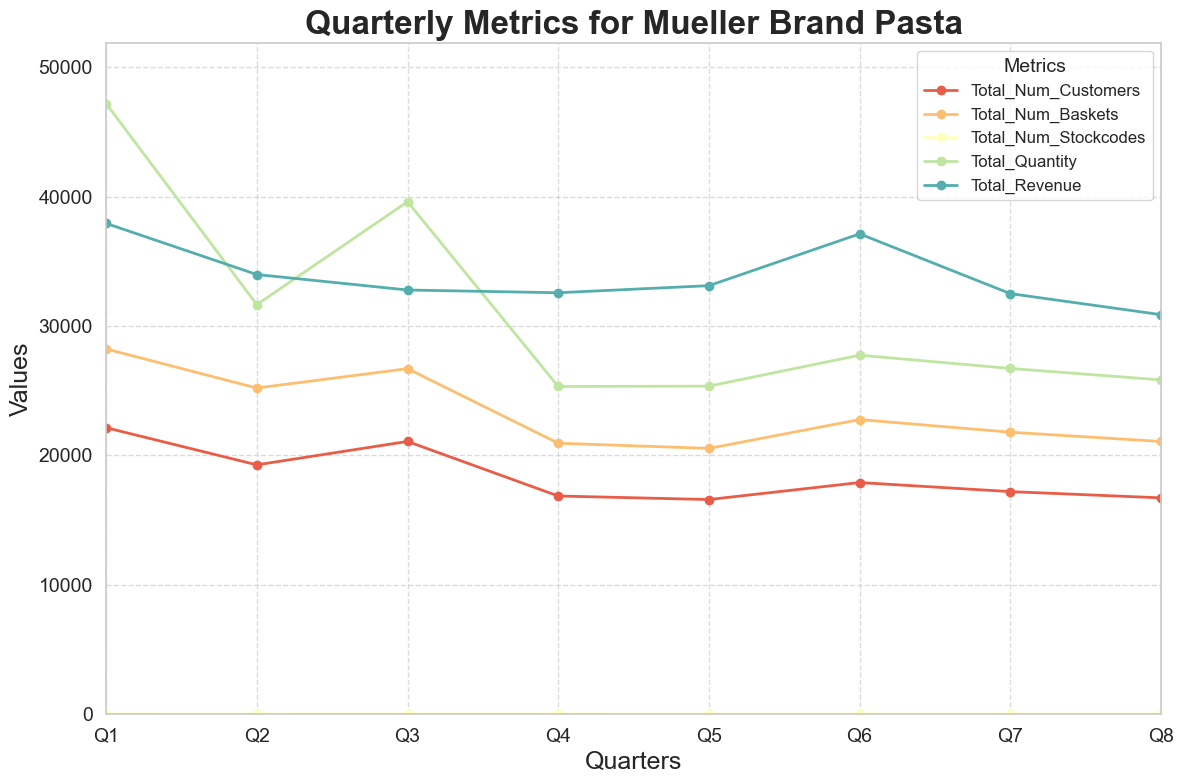

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for plotting
metrics = ['Total_Num_Customers', 'Total_Num_Baskets', 'Total_Num_Stockcodes', 'Total_Quantity', 'Total_Revenue']
quarters = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Create a figure and axes
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Spectral", len(metrics))  # Use a pleasant color palette

# Plot each metric with a line
for i, metric in enumerate(metrics):
    plt.plot(quarters, final_df.loc[final_df['Metric'] == metric].iloc[:, 1:].values.flatten(), 
             marker='o', label=metric, color=palette[i], linewidth=2)

# Add titles and labels
plt.title('Quarterly Metrics for Mueller Brand Pasta', fontsize=24, fontweight='bold')
plt.xlabel('Quarters', fontsize=18)
plt.ylabel('Values', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a legend
plt.legend(title='Metrics', title_fontsize='14', fontsize='12')

# Adjust axis limits and grid
plt.xlim(quarters[0], quarters[-1])
plt.ylim(0, final_df.iloc[:, 1:].max().max() * 1.1)
plt.grid(True, linestyle='--', alpha=0.7)

# Save or show the plot
plt.tight_layout()
plt.savefig('quarterly_metrics_plot.png', dpi=300)  # Save with high resolution
plt.show()


In [18]:
# Obtain raw statistics for quarter to quarter repeat buying

# Step 1: Create a dictionary of unique customers per quarter
customers_per_quarter = df.groupby('Quarter')['household'].unique().apply(set).to_dict()

# Ensure the quarters are sorted correctly
sorted_quarters = sorted(customers_per_quarter.keys())

# Step 2: Calculate the repeat buying rate for directly consecutive quarters
repeat_buying_rates = {}

for i in range(1, len(sorted_quarters)):
    current_quarter = sorted_quarters[i]
    previous_quarter = sorted_quarters[i - 1]

    # Calculate intersection (repeat customers) between current and previous quarter
    repeat_customers = customers_per_quarter[current_quarter].intersection(customers_per_quarter[previous_quarter])

    # Calculate repeat rate as a percentage
    if len(customers_per_quarter[previous_quarter]) > 0:  # To avoid division by zero
        repeat_rate = (len(repeat_customers) / len(customers_per_quarter[previous_quarter])) * 100
    else:
        repeat_rate = 0  # If there were no customers in the previous quarter, set repeat rate to 0

    repeat_buying_rates[current_quarter] = repeat_rate

# Convert to DataFrame for easier viewing
repeat_buying_rates_df = pd.DataFrame(list(repeat_buying_rates.items()), columns=['Quarter', 'Repeat Buying Rate (%)'])

repeat_buying_rates_df

# ask what else can be added
#if RB rate is high, we can granulate time period more

,Quarter,Repeat Buying Rate (%)
0,2,26.558266
1,3,29.512195
2,4,21.681374
3,5,24.325446
4,6,25.770089
5,7,24.995811
6,8,24.938961


In [19]:
# Obtain disaggregate results (by purchase class) for the most recent quarter

# Select data from the latest quarter only

latestq = df['Quarter'].max()
df_latestq = df[df['Quarter']==latestq]

# Calculate penetration (b) and zero buyers (b0)

total_unique_buyers = df['household'].nunique()
buyers_in_period = df_latestq['household'].nunique()
zero_buyers_in_period = total_unique_buyers - buyers_in_period

# Aggregate transactions into one per customer

customer_stats = df_latestq.groupby('household').agg({
    'basket': 'nunique',
    'dollar_sales': 'sum',
    'units': 'sum',
}).reset_index()
customer_stats.columns = ['Household', 'Purchase_Frequency', 'Total_Revenue', 'Total_Items']


# Aggregate customers in purchase frequency classses with a user specified cutoff
purchase_frequency_cutoff = 7

bins = list(range(0, purchase_frequency_cutoff+1)) + [float('inf')]
labels = [str(x) for x in range(purchase_frequency_cutoff)] + [f'{purchase_frequency_cutoff}+']
customer_stats['Purchase_Class'] = pd.cut(customer_stats['Purchase_Frequency'], bins=bins, right=False, 
    labels=labels)
buyer_class_aggregated = customer_stats.groupby('Purchase_Class').agg({
    'Household': 'nunique',
    'Total_Revenue': 'sum',
    'Total_Items': 'sum'
}).rename(columns={'Household': 'Number_of_Buyers'})

# Adjust for zero buyers
buyer_class_aggregated.loc['0', 'Number_of_Buyers'] += zero_buyers_in_period
buyer_class_aggregated['Percent_Total_Buyers'] = (
    buyer_class_aggregated['Number_of_Buyers'] / buyers_in_period * 100
)
buyer_class_aggregated['Percent_Total_Revenue'] = (
    buyer_class_aggregated['Total_Revenue'] / buyer_class_aggregated['Total_Revenue'].sum() * 100
)           
buyer_class_aggregated.loc['0', 'Percent_Total_Buyers'] = '0'
buyer_class_aggregated = buyer_class_aggregated.apply(pd.to_numeric, errors='coerce').round(0)

display(buyer_class_aggregated)

,Number_of_Buyers,Total_Revenue,Total_Items,Percent_Total_Buyers,Percent_Total_Revenue
Purchase_Class,,,,,
0,74233,0.0,0,0.0,0.0
1,13842,20026.0,16909,83.0,65.0
2,2016,5940.0,4977,12.0,19.0
3,532,2324.0,1919,3.0,8.0
4,201,1267.0,1008,1.0,4.0
5,62,456.0,380,0.0,1.0
6,32,304.0,254,0.0,1.0
7+,34,557.0,383,0.0,2.0


In [20]:
# Examine trends in the distribution of buyers by quarter

# Group transactions by household and quarter
customer_stats = df.groupby(['household', 'Quarter']).agg({
    'basket': 'nunique'
}).reset_index()
customer_stats.columns = ['Household', 'Quarter', 'Purchase_Frequency']

# Apply the purchase frequency classes
purchase_frequency_cutoff = 10  # Adjust as needed
bins = list(range(0, purchase_frequency_cutoff+1)) + [float('inf')]
labels = [str(x) for x in range(purchase_frequency_cutoff)] + [f'{purchase_frequency_cutoff}+']
customer_stats['Purchase_Class'] = pd.cut(customer_stats['Purchase_Frequency'], bins=bins, right=False, labels=labels)

# Group by 'Quarter' and 'Purchase_Class' and count unique households
buyer_class_aggregated = customer_stats.groupby(['Quarter', 'Purchase_Class']).agg({
    'Household': 'nunique'
}).reset_index()

# Rename the columns for clarity
buyer_class_aggregated.columns = ['Quarter', 'Purchase_Class', 'Number_of_Buyers']

# Pivot the data to have purchase classes as rows and quarters as columns, fill missing with 0
pivoted_data = buyer_class_aggregated.pivot(index='Purchase_Class', columns='Quarter', values='Number_of_Buyers')
pivoted_data = pivoted_data.fillna(0).astype(int)

# Calculate zero buyers per quarter and add them to the pivoted DataFrame
total_buyers_per_quarter = pivoted_data.sum()
zero_buyers_per_quarter = all_customers - total_buyers_per_quarter
pivoted_data.loc['0'] = zero_buyers_per_quarter

display (pivoted_data)


Quarter,1,2,3,4,5,6,7,8
Purchase_Class,,,,,,,,
0,68812,71682,69874,74089,74363,73049,73750,74233
1,17898,15364,17238,14072,13917,14646,14208,13842
2,3079,2691,2759,1985,1924,2263,2075,2016
3,767,767,674,521,465,645,568,532
4,235,253,243,177,158,214,205,201
5,93,102,90,59,71,70,66,62
6,37,52,47,27,24,32,37,32
7,20,18,15,15,15,16,21,10
8,5,15,3,3,4,8,11,11


## RFM 

In [21]:
from datetime import datetime

# DEFINE FUNCTIONS

def load_data():
    try:
        data = pd.read_csv(input_file_path)
        print("\nData loaded successfully!")
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def rfm_analysis(data):
    # Filter for the most recent one year of data
    current_day = data['day'].max()
    one_year_ago = current_day - 365
    filtered_data = data[data['day'] >= one_year_ago]

    # RFM Analysis
    rfm_df = filtered_data.groupby('household').agg({
        'day': lambda x: current_day - x.max(),  # Recency: Days since last purchase
        'dollar_sales': 'sum',  # Monetary Value: Total revenue per customer
        'basket': 'nunique'  # Frequency: Count unique purchase occasions per customer
    }).rename(columns={
        'day': 'Recency',
        'dollar_sales': 'MonetaryValue',
        'basket': 'Frequency'
    })

    return rfm_df


def create_rfm_bins(rfm_df, n_bins):
    # Add a tiny noise to handle duplicates
    rfm_df['Recency'] += np.random.normal(0, 1e-6, len(rfm_df))
    rfm_df['Frequency'] += np.random.normal(0, 1e-6, len(rfm_df))
    rfm_df['MonetaryValue'] += np.random.normal(0, 1e-6, len(rfm_df))
    
    rfm_df['RecencyBin'] = pd.qcut(rfm_df['Recency'], n_bins, labels=range(1, n_bins + 1), duplicates='drop')
    rfm_df['FrequencyBin'] = pd.qcut(rfm_df['Frequency'], n_bins, labels=range(1, n_bins + 1), duplicates='drop')
    rfm_df['MonetaryBin'] = pd.qcut(rfm_df['MonetaryValue'], n_bins, labels=range(1, n_bins + 1), duplicates='drop')
    
    return rfm_df

def save_data(data, output_file_path):
    if not output_file_path.endswith('.csv'):
        output_file_path += '.csv'
    data.to_csv(output_file_path, index=False)
    print(f"Data saved successfully to {output_file_path}")

    
# MAIN EXECUTION
      
input_file_path = 'dh_pasta.csv'
n_bins = 5

data = load_data()

if data is not None:
    
# Perform RFM analysis
    rfm_df = rfm_analysis(data)

# Bin RFM variables if the user wants
    
    rfm_df.to_csv("dh_pasta_RFM.csv", index=False)
    print("Please check the ouptput file for detailed results")
    print("END")
    
else:
    print("Data loading failed. Please check the file path and try again.")      
      





Data loaded successfully!
Please check the ouptput file for detailed results
END


In [22]:
data

,upc,product_description,commodity,brand,product_size,dollar_sales,units,household,basket,day,Week,FourWeek,Quarter,Year
0,789312112,ELENAS QTRO A/H PSTA W/SC,pasta,Elena's,12 OZ,5.99,1,233307,1550880,353,51,13,4,2
1,789316104,ELENAS TRE RNBW LNG PASTA,pasta,Elena's,12 OZ,4.99,1,92931,1087146,240,35,9,3,2
2,1140060206,GOOCH SOY ENRCH SPAGH,pasta,Gooch,16 OZ,1.37,1,502370,2506480,553,79,20,7,3
3,1140060206,GOOCH SOY ENRCH SPAGH,pasta,Gooch,16 OZ,1.37,1,277907,2736870,599,86,22,7,3
4,1140060206,GOOCH SOY ENRCH SPAGH,pasta,Gooch,16 OZ,1.99,1,317697,683688,208,30,8,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325317,9999985766,PRIVATE LABEL ITALIAN TRI COLORE CRE,pasta,Private Label Premium,16 OZ,9.95,5,459941,2938935,643,92,23,8,3
2325318,9999985766,PRIVATE LABEL ITALIAN TRI COLORE CRE,pasta,Private Label Premium,16 OZ,10.00,5,448056,2915450,638,92,23,8,3
2325319,9999985766,PRIVATE LABEL ITALIAN TRI COLORE CRE,pasta,Private Label Premium,16 OZ,10.76,4,346396,2138602,482,69,18,6,3
2325320,9999985766,PRIVATE LABEL ITALIAN TRI COLORE CRE,pasta,Private Label Premium,16 OZ,10.76,4,225832,389960,116,17,5,2,2


In [23]:
rfm_df

,Recency,MonetaryValue,Frequency
household,,,
1,0,1.00,1
2,10,59.64,32
4,144,1.27,2
10,315,1.28,1
12,80,1.55,2
...,...,...,...
510015,172,0.99,1
510018,84,4.58,2
510019,10,12.99,9


## Cluster Analysis 

In [24]:
# IMPORT PACKAGES AND SET STYLES
      
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# DEFINE FUNCTIONS

def load_data():
    try:
        data = pd.read_csv(input_file_path)
        print("\nData loaded successfully!")
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def select_cluster_variables(data):
    if data is not None:
        print("\nHere are all the variables in your dataset:")
        print(data.columns.tolist())
        include_vars = 'Recency, MonetaryValue, Frequency'
        selected_vars = [var.strip() for var in include_vars.split(',')] if include_vars else []
        return data[selected_vars].copy() if selected_vars else pd.DataFrame()
    else:
        return pd.DataFrame()

def check_collinearity(data):
    if data.empty:
        print("\nNo variables selected to check for collinearity.")
        return data
    else:
        correlation_matrix = data.corr()
        np.fill_diagonal(correlation_matrix.values, 0)
        print("\nCorrelation matrix:")
        print(correlation_matrix)

        # Check for high correlations, ignoring diagonal
        high_corr = (correlation_matrix.abs() > 0.8).any().any()
        if high_corr:
            print("\nWarning: High collinearity detected among selected variables.")
        
        return data
        
def get_max_clusters():
    # Max_clusters are set to default 7
    max_clusters = 7
    return max(max_clusters, 2) 

def normalize_data(data, scaler):
    if data.empty:
        print("No data provided for normalization.")
        return data
    normalized_data = scaler.fit_transform(data)
    return pd.DataFrame(normalized_data, columns=data.columns)

def choose_scaling_method():

    #Min_max Scaling is chosen by default
    choice = 2    
    if choice == '2':
        return MinMaxScaler()
    else:
        return StandardScaler()  

def calculate_silhouette_scores(data, max_clusters):
    silhouette_scores = {}
    cluster_assignments = {}

    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores[n_clusters] = score
        cluster_assignments[n_clusters] = labels

    return silhouette_scores, cluster_assignments

def select_number_of_clusters(silhouette_scores):
    # number of clusters is set to default 4
    selected_clusters = 4
    return selected_clusters

def save_cluster_memberships(original_data, normalized_data, cluster_assignments, selected_clusters):
    # Increment cluster numbering for user-friendliness
    cluster_labels = cluster_assignments[selected_clusters] + 1

    # Save normalized data with clusters
    normalized_data_with_clusters = normalized_data.copy()
    normalized_data_with_clusters['Cluster'] = cluster_labels
    normalized_data_with_clusters.to_csv("normalized_cluster_memberships.csv", index=False)

    # Save original data with clusters
    original_data_with_clusters = original_data.copy()
    original_data_with_clusters['Cluster'] = cluster_labels
    original_data_with_clusters.to_csv("original_cluster_memberships.csv", index=False)

    return original_data_with_clusters, normalized_data_with_clusters

def run_anova(data):
    results = {}
    for col in data.columns[:-1]:  # Exclude the 'Cluster' column
        model = ols(f'{col} ~ C(Cluster)', data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        results[col] = anova_table
    return results

def select_post_hoc_variables(data):
    
    #Default variables are set
    post_hoc_vars = 'Recency, MonetaryValue, Frequency'
    if post_hoc_vars.strip():
        selected_vars = [var.strip() for var in post_hoc_vars.split(',')]
        # Check if the selected variables are in the DataFrame columns to avoid KeyErrors
        selected_vars = [var for var in selected_vars if var in data.columns]
        return data[selected_vars].copy() if selected_vars else pd.DataFrame()
    else:
        return pd.DataFrame()

def run_post_hoc_anova(data, cluster_labels):
    results = {}
    # Ensure the DataFrame is a copy to avoid SettingWithCopyWarning when modifying
    data = data.copy()
    data.loc[:, 'Cluster'] = cluster_labels  # Safely add cluster labels to the DataFrame
    for col in data.columns[:-1]:  # Exclude the 'Cluster' column
        model = ols(f'{col} ~ C(Cluster)', data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        results[col] = anova_table
    return results

def profile_clusters(data):
    # Ensure that 'Cluster' is a categorical variable to handle any potential issues with non-sequential cluster numbers
    data['Cluster'] = pd.Categorical(data['Cluster'])
    cluster_profile = data.groupby('Cluster').mean()
    cluster_sizes = data.groupby('Cluster').size()
    cluster_profile['Cluster Size'] = cluster_sizes
    cluster_profile = cluster_profile.transpose()
    return cluster_profile



In [25]:
# MAIN EXECUTION
input_file_path = 'dh_pasta_RFM.csv'     

source = load_data()
source.dropna(inplace = True)
data = source.sample(frac=0.1, random_state=1)

select_variables = 'Recency, MonetaryValue, Frequency'

if data is not None:

    print("\nNOTE: Clustering requires numeric variables. If you wish to include categorical variables:")
    print("- Convert them to one-hot encoded (dummy) variables in your source data file.")
    print("- Select Min-Max scaling below, but be aware it is more sensitive to outliers.")
    print("- With substantial outliers, consider selecting Standard Scaling (normalisation).")

    selected_data = select_cluster_variables(data)
    print("\nFirst few cases of the selected variables:")
    print(selected_data.head(10))

    scaler = choose_scaling_method()     # User selects the scaling method

    collinearity_checked_data = check_collinearity(selected_data)
    if collinearity_checked_data is not None:
        print("\nProceeding with the following data:\n")
        print(collinearity_checked_data.head(10))
        print("\nYOU SHOULD CHECK FOR AND CONSIDER OUTLIERS SEPARATELY")
    else:
        # Optionally, repeat the selection process until user is satisfied
        while collinearity_checked_data is None:
            collinearity_checked_data = check_collinearity(selected_data)

    max_clusters = get_max_clusters()
    normalized_data = normalize_data(collinearity_checked_data, scaler)

    silhouette_scores, cluster_assignments = calculate_silhouette_scores(normalized_data, max_clusters)
    
    print("\nSilhouette Scores range from -1 to 1, reflecting accuracy of cluster assignment.")
    print("Average silhouette scores indicate overall quality of the cluster solution.")
    print("<= 0.1 Negligible: No meaningful cluster structure.")
    print("0.1 to 0.3 Weak: Clusters exist but have considerable overlap.")
    print("0.3 to 0.5 Moderate: Clusters are more distinct but still have some overlap.")
    print("0.5 to 0.7 Strong: Clusters are well-separated with relatively little overlap.")
    print("0.7 to 1.0 Very Strong: Excellent separation and well-defined clusters.")

    print("\nSilhouette Scores:")
    for k, v in silhouette_scores.items():
        print(f"Clusters: {k}, Silhouette Score: {v:.4f}")

    selected_clusters = select_number_of_clusters(silhouette_scores)
    print(f"Selected {selected_clusters} clusters for further analysis.\n")

    original_data_with_clusters, normalized_data_with_clusters = save_cluster_memberships(
        data,
        normalized_data, 
        cluster_assignments, 
        selected_clusters
    )

    # First ANOVA: On normalized data using for clustering
    print("\nANOVA RESULTS FOR CLUSTERING VARIABLES:")
    anova_results = run_anova(normalized_data_with_clusters)
    for variable, result in anova_results.items():
        print(f"\nANOVA result for {variable} - Normalized:")
        print(result)

    # Second ANOVA: On non-normalized data may have been used for clustering or not 
    post_hoc_data = select_post_hoc_variables(data)

    # Ensure that cluster labels are applied correctly to the selected non-normalized data
    if not post_hoc_data.empty:
        post_hoc_data['Cluster'] = original_data_with_clusters['Cluster'].values
    else:
        print("No variables selected for post hoc analysis. No cluster profiles will be available")
        post_hoc_data['Cluster'] = pd.Series()

    print("\nANOVA RESULTS FOR POST-HOC VARIABLES:")
    post_hoc_anova_results = run_post_hoc_anova(post_hoc_data, post_hoc_data['Cluster'])
    for variable, result in post_hoc_anova_results.items():
        print(f"\nPost Hoc ANOVA result for {variable}:")
        print(result)

    # Print the cluster profiles
    # Round the DataFrame to 2 decimal places
    print("\nCluster Profiles:")
    cluster_profiles = profile_clusters(post_hoc_data)
    display(cluster_profiles.style.format("{:.2f}"))

    print("\nAll analyses are complete.")
    print("\nNormalized cluster memberships have been saved to 'normalized_cluster_memberships.csv'.")
    print("Original cluster memberships have been saved to 'original_cluster_memberships.csv'.")
    print("Check the CSV files for detailed results.")
    print("Consult silhouette score guidance to evaluate cluster quality.")

else:
    print("Data loading failed. Please check the file path and try again.")


Data loaded successfully!

NOTE: Clustering requires numeric variables. If you wish to include categorical variables:
- Convert them to one-hot encoded (dummy) variables in your source data file.
- Select Min-Max scaling below, but be aware it is more sensitive to outliers.
- With substantial outliers, consider selecting Standard Scaling (normalisation).

Here are all the variables in your dataset:
['Recency', 'MonetaryValue', 'Frequency']

First few cases of the selected variables:
        Recency  MonetaryValue  Frequency
110216      143           1.51          2
133480       90           4.22          3
269286      263           0.99          1
274926       18           5.55          5
16492       252           2.49          2
69218        33           8.96          5
109267      307           2.38          1
182622       28           2.33          4
298090       33           1.98          1
38072       346           0.99          1

Correlation matrix:
                Recency  Mon

Cluster,1,2,3,4
Recency,71.36,20.28,43.68,248.54
MonetaryValue,3.08,32.36,11.99,2.11
Frequency,2.38,19.00,8.11,1.49
Cluster Size,14335.00,766.00,4686.00,10350.00



All analyses are complete.

Normalized cluster memberships have been saved to 'normalized_cluster_memberships.csv'.
Original cluster memberships have been saved to 'original_cluster_memberships.csv'.
Check the CSV files for detailed results.
Consult silhouette score guidance to evaluate cluster quality.


## Brands Competition

In [29]:
# Load your data (if CSV)
df = dh_pasta.copy()  # Use a copy of the DataFrame

# Group by brand to compute the necessary metrics
brand_group = df.groupby('brand').agg({
    'household': 'nunique',  # Penetration: unique households buying the brand
    'units': 'sum',          # Total units sold by the brand
    'basket': 'count',       # Total transactions for the brand
    'dollar_sales': 'sum'    # Total dollar sales by the brand
}).reset_index()

# Total number of unique households in the dataset (for penetration calculation)
total_households = df['household'].nunique()

# Penetration (b): unique households count
brand_group['b'] = brand_group['household']

# Penetration as a proportion and percentage
brand_group['b_prop'] = brand_group['b'] / total_households  # Proportion of total households
brand_group['b_%'] = (brand_group['b_prop'] * 100).round(3)  # Percentage

# Purchase Frequency (w): average number of purchases per household
brand_group['w'] = brand_group['units'] / brand_group['household']

# Share: the brand’s share of total sales in the category as a percentage
total_sales = df['dollar_sales'].sum()
brand_group['share'] = ((brand_group['dollar_sales'] / total_sales) * 100).round(2)

# Share of Category Requirement (SCR)
total_category_units = df['units'].sum()
brand_group['SCR'] = ((brand_group['units'] / total_category_units) * 100).round(2)

# Sole buyers calculation
df['brands_per_household'] = df.groupby('household')['brand'].transform('nunique')  # Use .loc to avoid SettingWithCopyWarning
sole_buyers_df = df[df['brands_per_household'] == 1]
sole_buyers_per_brand = sole_buyers_df.groupby('brand')['household'].nunique()
total_households_per_brand = df.groupby('brand')['household'].nunique()
brand_group.set_index('brand', inplace=True)  # Set index to align with sole buyers
brand_group['Sole'] = (sole_buyers_per_brand / total_households_per_brand).fillna(0).round(3)

# Sort brands by share in descending order
brand_group = brand_group.sort_values(by='share', ascending=False)

# Identify small brands with less than 1% of the total share
small_brands = brand_group[brand_group['share'] < 1]

# Combine small brands into one 'Other' group
other = pd.DataFrame({
    'brand': ['Other'],
    'b': [small_brands['b'].sum()],
    'b_prop': [small_brands['b_prop'].sum()],
    'b_%': [small_brands['b_%'].sum()],
    'w': [small_brands['w'].mean()],
    'share': [small_brands['share'].sum()],
    'SCR': [small_brands['SCR'].mean()],
    'Sole': [small_brands['Sole'].mean()]
})

# Filter out the small brands and append the 'Other' row
brand_group = brand_group[brand_group['share'] >= 1]
brand_group = pd.concat([brand_group.reset_index(), other], ignore_index=True)

# Calculate totals
totals = brand_group[['b', 'b_prop', 'b_%', 'w', 'share', 'SCR', 'Sole']].sum()
totals['brand'] = 'Total'  # Add label for the total row

# Append the totals using pd.concat
brand_group = pd.concat([brand_group, pd.DataFrame([totals])], ignore_index=True)

# Round all numbers to 3 decimals for consistency
brand_group = brand_group.round(3)

# Select final columns and preview the result
brand_group = brand_group[['brand', 'share', 'b_prop', 'b_%', 'w', 'SCR', 'Sole']]

In [30]:
brand_group

,brand,share,b_prop,b_%,w,SCR,Sole
0,Private Label,34.89,0.650,64.958,4.747,44.100,0.340
1,Barilla,15.21,0.305,30.500,3.137,13.680,0.163
2,Creamette,9.52,0.211,21.059,2.936,8.840,0.190
3,Mueller,9.50,0.221,22.102,2.742,8.670,0.250
4,Ronzoni,7.49,0.167,16.736,2.726,6.520,0.149
5,Private Label Premium,7.32,0.186,18.602,2.725,7.250,0.152
6,San Giorgio,4.35,0.103,10.341,2.418,3.580,0.099
7,Hodgson Mills,2.82,0.046,4.601,2.340,1.540,0.118
8,No Yolks,2.32,0.068,6.818,2.046,2.000,0.097
9,Private Label Value,1.44,0.051,5.055,1.716,1.240,0.135


In [31]:
brand_group.to_csv('brand_group.csv')

## Double Jeopardy 

In [32]:
#pip install adjustText


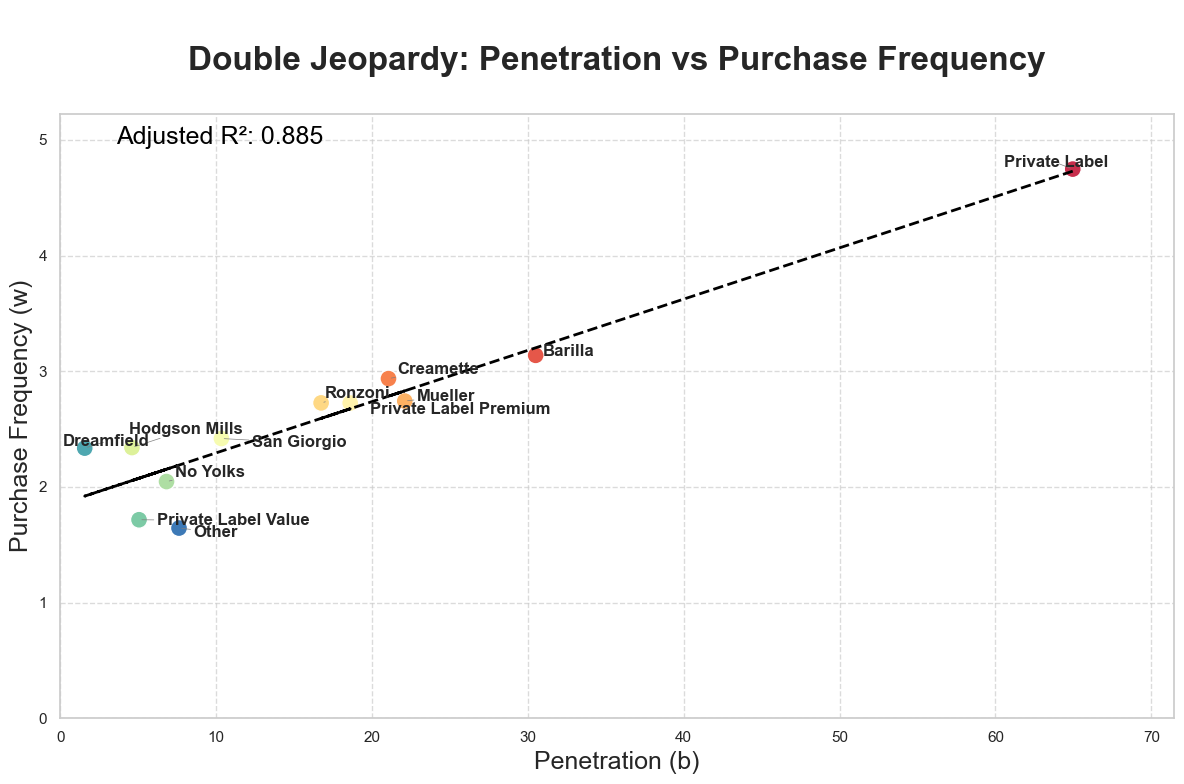

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from adjustText import adjust_text

# Prepare data, excluding the "Total" row
brand_group_filtered = brand_group[brand_group['brand'] != 'Total']
x = brand_group_filtered['b_%']  # Penetration (b)
y = brand_group_filtered['w']  # Purchase Frequency (w)
brands = brand_group_filtered['brand']

# Create a scatter plot
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Spectral", len(brands))  # Use a pleasant color palette
sns.scatterplot(x=x, y=y, hue=brands, palette=palette, s=150, edgecolor='w', legend=None)

# Fit a trend line
X = sm.add_constant(x)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Add trend line to the plot
plt.plot(x, predictions, color='black', linewidth=2, linestyle='--', label='Trend Line')

# Annotate brands with adjusted positioning
texts = []
for i, brand in enumerate(brands):
    texts.append(plt.text(x[i], y[i], brand, fontsize=12, fontweight='bold'))

# Use adjustText to prevent overlap
adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# Add titles and labels
plt.title('\nDouble Jeopardy: Penetration vs Purchase Frequency\n', fontsize=24, fontweight='bold')
plt.xlabel('Penetration (b)', fontsize=18)
plt.ylabel('Purchase Frequency (w)', fontsize=18)

# Adjust axis limits
plt.xlim(0, max(x) * 1.1)
plt.ylim(0, max(y) * 1.1)

# Calculate adjusted R-squared and display it on the plot
r_squared = model.rsquared_adj
plt.text(0.05, 0.95, f'Adjusted R²: {r_squared:.3f}', transform=plt.gca().transAxes, fontsize=18, color='black', ha='left')

# Show grid and customize appearance
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save or show the plot
plt.savefig('double_jeopardy_plot_pretty.png', dpi=300)
plt.show()


## Stochastic Churn Benchmark


In [34]:
df = dh_pasta
# Step 1: Calculate total dollar sales for each brand
brand_sales = df.groupby('brand')['dollar_sales'].sum().sort_values(ascending=False)

# Step 2: Identify top 10 brands by market share
top_10_brands = brand_sales.head(10).index.tolist()

# Step 3: Categorize all other brands as "Other" using .loc to avoid the warning
df.loc[~df['brand'].isin(top_10_brands), 'brand'] = 'Other'

# Step 4: Filter the data for quarters 6 and 7
df_filtered = df[df['Quarter'].isin([6, 7])]

# Step 5: Identify households with purchases in both quarters 6 and 7
households_in_both_quarters = df_filtered.groupby('household')['Quarter'].nunique()
households_in_both_quarters = households_in_both_quarters[households_in_both_quarters == 2].index

# Step 6: Filter data for these households
df_filtered = df_filtered[df_filtered['household'].isin(households_in_both_quarters)]

# Step 7: Create a pivot table to find the brand for each household in each quarter
pivot_df = df_filtered.pivot_table(index='household', columns='Quarter', values='brand', aggfunc='first')

# Rename the columns for clarity
pivot_df.columns = ['Quarter_6_Brand', 'Quarter_7_Brand']

# Step 8: Create the transition matrix
transition_matrix = pd.crosstab(pivot_df['Quarter_6_Brand'], pivot_df['Quarter_7_Brand'])

# Step 9: Normalize to get transition probabilities
transition_matrix_prob = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)


In [35]:
transition_matrix

Quarter_7_Brand,Barilla,Creamette,Hodgson Mills,Mueller,No Yolks,Other,Private Label,Private Label Premium,Private Label Value,Ronzoni,San Giorgio
Quarter_6_Brand,,,,,,,,,,,
Barilla,3130,1160,139,745,221,359,2504,371,87,1074,286
Creamette,1253,6418,167,277,313,360,3695,260,143,144,622
Hodgson Mills,114,78,425,88,24,98,215,38,7,189,25
Mueller,807,312,79,4227,163,218,1648,182,47,984,245
No Yolks,214,228,28,174,390,67,556,68,27,181,113
Other,419,395,165,214,62,838,565,110,21,344,106
Private Label,2254,2429,269,1539,572,502,14006,587,408,1651,743
Private Label Premium,499,266,67,199,71,150,813,614,30,259,84
Private Label Value,70,102,6,56,15,14,377,26,245,52,39


In [36]:

transition_matrix.to_csv('transition_pasta.csv')

In [37]:
transition_matrix_prob

Quarter_7_Brand,Barilla,Creamette,Hodgson Mills,Mueller,No Yolks,Other,Private Label,Private Label Premium,Private Label Value,Ronzoni,San Giorgio
Quarter_6_Brand,,,,,,,,,,,
Barilla,0.310639,0.115125,0.013795,0.073938,0.021933,0.035629,0.248511,0.036820,0.008634,0.106590,0.028384
Creamette,0.091781,0.470114,0.012233,0.020290,0.022927,0.026370,0.270656,0.019045,0.010475,0.010548,0.045561
Hodgson Mills,0.087625,0.059954,0.326672,0.067640,0.018447,0.075327,0.165257,0.029208,0.005380,0.145273,0.019216
Mueller,0.090552,0.035009,0.008864,0.474304,0.018290,0.024461,0.184919,0.020422,0.005274,0.110413,0.027491
No Yolks,0.104594,0.111437,0.013685,0.085044,0.190616,0.032747,0.271750,0.033236,0.013196,0.088465,0.055230
Other,0.129361,0.121951,0.050942,0.066070,0.019142,0.258722,0.174437,0.033961,0.006483,0.106206,0.032726
Private Label,0.090304,0.097316,0.010777,0.061659,0.022917,0.020112,0.561138,0.023518,0.016346,0.066146,0.029768
Private Label Premium,0.163499,0.087156,0.021953,0.065203,0.023263,0.049148,0.266383,0.201180,0.009830,0.084862,0.027523
Private Label Value,0.069860,0.101796,0.005988,0.055888,0.014970,0.013972,0.376248,0.025948,0.244511,0.051896,0.038922


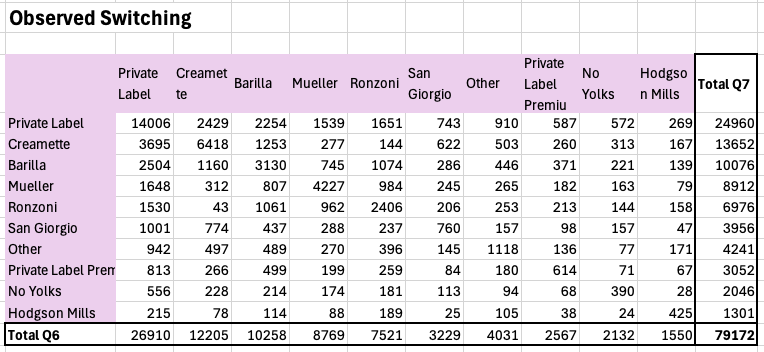

In [38]:
from IPython.display import Image

display(Image(filename='Observed Switching.png'))

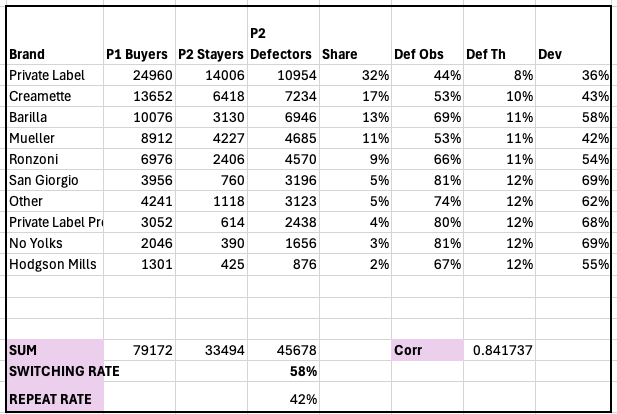

In [39]:
display(Image(filename='Deviation Summary.png'))


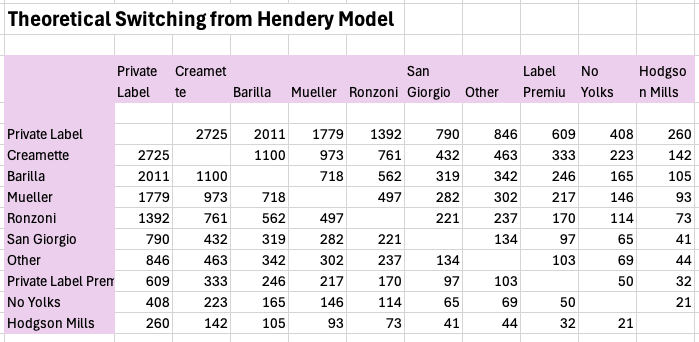

In [40]:
display(Image(filename='Theoretical Switching.png'))


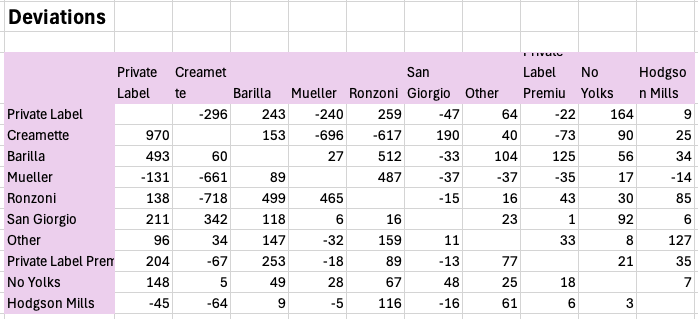

In [41]:
display(Image(filename='Detailed Deviation.png'))


## NBD-Dirichlet

In [42]:
pd.set_option('display.max_rows', 50) 

In [43]:
df = dh_pasta

In [44]:
#Selected Qurter for Analysis is 7, in case the Q8 is not completed

selected_quarter = 7
household_threshold = 1000

def calculate_brand_statistics(df, selected_quarter, household_threshold):
    """Calculate statistics for each brand, including 'All' and 'Other' categories."""
    # Filter the DataFrame for the selected quarter

    df_quarter = df[df['Quarter'] == selected_quarter]

    # Determine which brands are small based on the household threshold
    brand_household_count = df_quarter.groupby('brand')['household'].nunique()
    small_brands = brand_household_count[brand_household_count < household_threshold].index.tolist()

    # Create an empty DataFrame to store results
    results_df = pd.DataFrame()

    # Process each brand, omitting the small brands
    brand = df_quarter['brand'].unique()

    for brands in brand: 
        if brands in small_brands:
            continue  # Skip processing for small brands
        
        print(f"Processing brand: {brands}")
        
        # Filter the data for the current brand
        df_brand = df_quarter[df_quarter['brand'] == brands]
        
        # Calculate the required statistics for the brand
        quarterly_totals = df_brand.groupby('Quarter').agg(
            Total_Num_Customers=('household', 'nunique'),
            Total_Num_Baskets=('basket', 'nunique'),
            Total_Num_Stockcodes=('upc', 'nunique'),
            Total_Quantity=('units', 'sum'),
            Total_Revenue=('dollar_sales', 'sum')
        ).reset_index()
        
        # Add a column for the brand name
        quarterly_totals['brand'] = brands
        
        # Append the results to the results_df DataFrame
        results_df = pd.concat([results_df, quarterly_totals], ignore_index=True)

    # Calculate overall category statistics (All brands combined)
    overall_totals = df_quarter.groupby('Quarter').agg(
        Total_Num_Customers=('household', 'nunique'),
        Total_Num_Baskets=('basket', 'nunique'),
        Total_Num_Stockcodes=('upc', 'nunique'),
        Total_Quantity=('units', 'sum'),
        Total_Revenue=('dollar_sales', 'sum')
    ).reset_index()

    # Add a column for the brand, labeling it as 'All'
    overall_totals['brand'] = 'All'

    # Append the overall category results to the results_df DataFrame
    results_df = pd.concat([results_df, overall_totals], ignore_index=True)

    # Aggregate the small brands into an 'Other' category
    df_other = df_quarter[df_quarter['brand'].isin(small_brands)]
    other_totals = df_other.groupby('Quarter').agg(
        Total_Num_Customers=('household', 'nunique'),
        Total_Num_Baskets=('basket', 'nunique'),
        Total_Num_Stockcodes=('upc', 'nunique'),
        Total_Quantity=('units', 'sum'),
        Total_Revenue=('dollar_sales', 'sum')
    ).reset_index()

    # Label the 'Other' category
    other_totals['brand'] = 'Other'

    # Append the 'Other' category to the results_df DataFrame
    results_df = pd.concat([results_df, other_totals], ignore_index=True)

    return results_df

def save_to_csv(df, filename):
    """Save the DataFrame to a CSV file."""
    df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")

# Example of how to use these functions
if __name__ == "__main__":

    # Calculate brand statistics
    results_df = calculate_brand_statistics(df, selected_quarter, household_threshold)

    # Save the results to a CSV file
    save_to_csv(results_df, 'brand_statistics_quarter_selected_with_overall_and_other.csv')
    
    # Establish the number of category buyers / customers

    all_customers = (df['household']).nunique()
    print("Total number of unique households buying: ", all_customers)

    # Display the first few rows of the results for confirmation
    display(results_df)

Processing brand: Other
Processing brand: Creamette
Processing brand: Mueller
Processing brand: Ronzoni
Processing brand: San Giorgio
Processing brand: Hodgson Mills
Processing brand: No Yolks
Processing brand: Barilla
Processing brand: Private Label Value
Processing brand: Private Label
Processing brand: Private Label Premium
Results saved to brand_statistics_quarter_selected_with_overall_and_other.csv
Total number of unique households buying:  411502


,Quarter,Total_Num_Customers,Total_Num_Baskets,Total_Num_Stockcodes,Total_Quantity,Total_Revenue,brand
0,7,7443,9250,120,11727,24143.15,Other
1,7,19934,25380,21,35233,34754.89,Creamette
2,7,17202,21793,21,26719,32499.61,Mueller
3,7,16182,20077,31,27401,31569.90,Ronzoni
4,7,6976,8157,15,9950,12204.78,San Giorgio
5,7,3970,5190,10,6256,11864.57,Hodgson Mills
6,7,5943,6864,7,8659,10150.95,No Yolks
7,7,29732,39001,34,54191,61039.52,Barilla
8,7,3029,3452,7,4354,4218.42,Private Label Value
9,7,80927,122496,29,190369,126843.02,Private Label


In [45]:
df = dh_pasta.copy()  # Use a copy of the DataFrame 

# Filter for only Quarter 7
df_Q7 = df[df['Quarter'] == 7].copy()  # Create a new copy to avoid SettingWithCopyWarning

# Group by brand to compute the necessary metrics for Quarter 7
brand_group = df_Q7.groupby('brand').agg({
    'household': 'nunique',  # Penetration: unique households buying the brand
    'units': 'sum',          # Total units sold by the brand
    'basket': 'count',       # Total transactions for the brand
    'dollar_sales': 'sum'    # Total dollar sales by the brand
}).reset_index()

# Total number of unique households in the dataset (for penetration calculation)
total_households = df_Q7['household'].nunique()

# Penetration (b): unique households count
brand_group['b'] = brand_group['household']

# Penetration as a proportion and percentage
brand_group['b_prop'] = brand_group['b'] / total_households  # Proportion of total households
brand_group['b_%'] = (brand_group['b_prop'] * 100).round(3)  # Percentage

# Purchase Frequency (w): average number of purchases per household
brand_group['w'] = brand_group['units'] / brand_group['household']

# Share: the brand’s share of total sales in the category as a percentage
total_sales = df_Q7['dollar_sales'].sum()
brand_group['share'] = ((brand_group['dollar_sales'] / total_sales) * 100).round(2)

# Share of Category Requirement (SCR)
total_category_units = df_Q7['units'].sum()
brand_group['SCR'] = ((brand_group['units'] / total_category_units) * 100).round(2)

# Sole buyers calculation
# 1. Count unique brands per household (how many brands each household bought)
df_Q7['brands_per_household'] = df_Q7.groupby('household')['brand'].transform('nunique')

# 2. Filter households that bought only one brand (sole buyers)
sole_buyers_df = df_Q7[df_Q7['brands_per_household'] == 1]

# 3. Calculate the number of sole buyers per brand
sole_buyers_per_brand = sole_buyers_df.groupby('brand')['household'].nunique()

# 4. Calculate total households per brand
total_households_per_brand = df_Q7.groupby('brand')['household'].nunique()

# 5. Calculate the proportion of sole buyers for each brand
brand_group.set_index('brand', inplace=True)  # Set index to align with sole buyers
brand_group['Sole'] = (sole_buyers_per_brand / total_households_per_brand).fillna(0).round(3)

# Sort brands by share in descending order
brand_group = brand_group.sort_values(by='share', ascending=False)

# Identify small brands with less than 1% of the total share
small_brands = brand_group[brand_group['share'] < 1]

# Combine small brands into one 'Other' group
if not small_brands.empty:  # Check if there are any small brands
    other = pd.DataFrame({
        'brand': ['Other'],
        'b': [small_brands['b'].sum()],
        'b_prop': [small_brands['b_prop'].sum()],
        'b_%': [small_brands['b_%'].sum()],
        'w': [small_brands['w'].mean()],
        'share': [small_brands['share'].sum()],
        'SCR': [small_brands['SCR'].mean()],
        'Sole': [small_brands['Sole'].mean()]
    })
else:
    other = pd.DataFrame(columns=brand_group.columns)  # Empty DataFrame if no small brands

# Filter out the small brands and append the 'Other' row
brand_group = brand_group[brand_group['share'] >= 1]
brand_group = pd.concat([brand_group.reset_index(), other], ignore_index=True)

# Calculate totals
totals = brand_group[['b', 'b_prop', 'b_%', 'w', 'share', 'SCR', 'Sole']].sum()
totals['brand'] = 'Total'  # Add label for the total row

# Append the totals using pd.concat
brand_group = pd.concat([brand_group, pd.DataFrame([totals])], ignore_index=True)

# Round all numbers to 3 decimals for consistency
brand_group = brand_group.round(3)

# Select final columns and rename DataFrame to brand_comp_Q7
brand_comp_Q7 = brand_group[['brand', 'share', 'b_prop', 'b_%', 'w', 'SCR', 'Sole']]


In [46]:
brand_comp_Q7

,brand,share,b_prop,b_%,w,SCR,Sole
0,Private Label,33.97,0.550,54.972,2.352,47.85,0.638
1,Barilla,16.34,0.202,20.196,1.823,13.62,0.418
2,Creamette,9.31,0.135,13.541,1.767,8.86,0.471
3,Mueller,8.70,0.117,11.685,1.553,6.72,0.544
4,Ronzoni,8.45,0.110,10.992,1.693,6.89,0.400
5,Private Label Premium,6.47,0.092,9.221,1.696,5.79,0.384
6,Other,6.46,0.051,5.056,1.576,2.95,0.366
7,San Giorgio,3.27,0.047,4.739,1.426,2.50,0.300
8,Hodgson Mills,3.18,0.027,2.697,1.576,1.57,0.398
9,No Yolks,2.72,0.040,4.037,1.457,2.18,0.326


In [47]:
brand_comp_Q7.to_csv('brand_comp_Q7.csv')

In [48]:
b_prop_mw = (brand_comp_Q7['b_prop'][:-1] * brand_comp_Q7['share'][:-1]).sum() / 100
w_mw = (brand_comp_Q7['w'][:-1] * brand_comp_Q7['share'][:-1]).sum() / 100



In [49]:
# Display the results
b_prop_mw, w_mw

(0.26485210000000003, 1.9036860999999998)

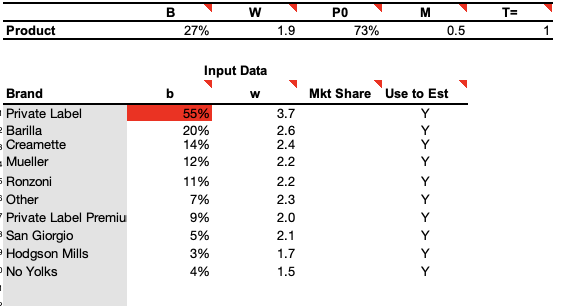

In [50]:
display(Image(filename='Dirichlet Table.png'))


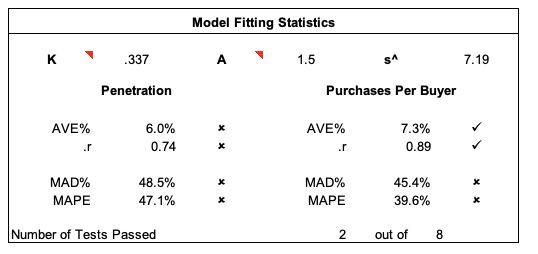

In [51]:
display(Image(filename='Dirichlet Summary.png'))
